In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [133]:
#reading the loan.csv file in a pandas dataframe
loan_df = pd.read_csv("Downloads/loan.csv",sep=',', index_col=False, dtype='unicode')

In [173]:
loan_df.size

4408587

In [237]:
#Checking whether grade has anu correlation with loan status
loan_grade_df = loan_df.groupby(['grade','loan_status'])['id'].count().reset_index()

In [239]:
loan_grade_df['grade loan_status'] = loan_grade_df['grade']+'-'+loan_grade_df['loan_status']

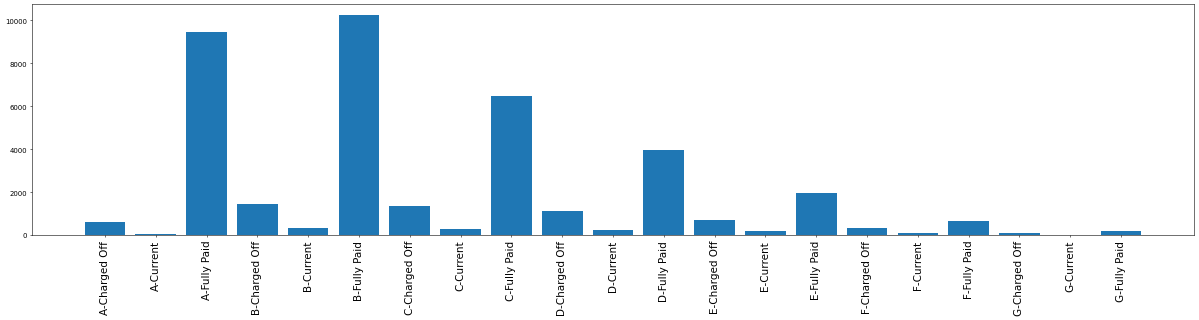

In [241]:
from matplotlib.pyplot import figure

figure(figsize=(30, 6), dpi=50)
plt.bar(loan_grade_df['grade loan_status'],loan_grade_df['id'])
plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.show()
# in the below plot, we can see that grade has not much effect on the Charged off status, however it can be seen that charged off is comparively 
# higher for grade B,C and D compared to E, F and G grade 

In [183]:
#Checking the effect of employment length on loan status
loan_notna_df = loan_df[~loan_df['emp_length'].isnull()]

In [187]:
loan_notna_df = loan_notna_df[~loan_notna_df['emp_length'].isnull()]

In [189]:
loan_notna_df['emp_length'].isnull().count()

38642

In [201]:
loan_notna_df['emp_length'] = loan_notna_df['emp_length'].astype('string').\
apply(lambda x: '0' if x == '0' else x.replace('year','').replace('+','').replace('<','').replace('s','').strip()).astype('int64')

In [247]:
loan_medianemplen_df = loan_notna_df.groupby(['loan_status'])['emp_length'].median().reset_index()

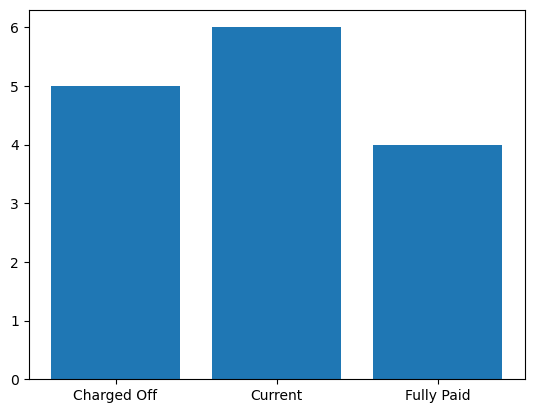

In [249]:
plt.bar(loan_medianemplen_df['loan_status'],loan_medianemplen_df['emp_length'])
plt.show()
#it seems employment length of a median value of 5 is more susceptible to be charged off

In [255]:
#checking correlation between annual income and loan status
loan_df['annual_inc'] = loan_df['annual_inc'].astype('float')
loan_medianannual_df = loan_df.groupby(['loan_status'])['annual_inc'].median().reset_index()

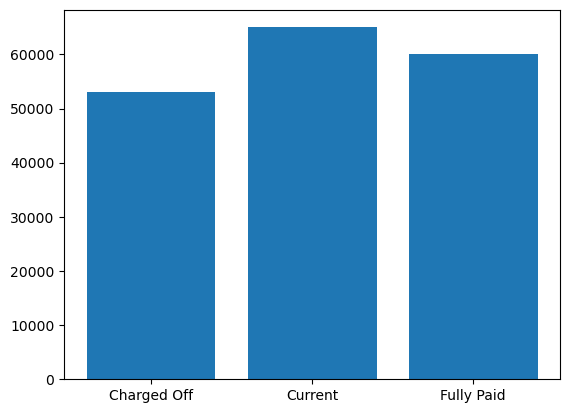

In [257]:
plt.bar(loan_medianannual_df['loan_status'],loan_medianannual_df['annual_inc'])
plt.show()
# From the plot below it seems customers with about 50000 annual income are more susecptible for charged off 

In [221]:
#checking correlation between home owenership type and loan status
loan_home = loan_df.groupby(['home_ownership','loan_status'])['id'].count().reset_index()
loan_home['home_loan_status'] = loan_df['home_ownership']+" "+loan_df['loan_status']


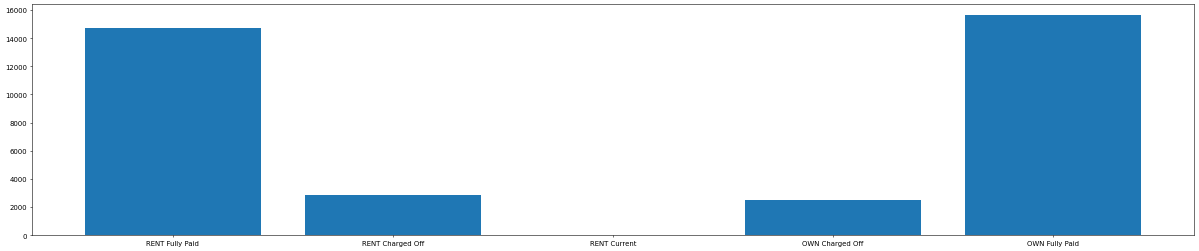

In [225]:
from matplotlib.pyplot import figure

figure(figsize=(30, 6), dpi=50)


plt.bar(loan_home['home_loan_status'] ,loan_home['id'])
plt.show()
#From the plot below it seems there is not much difference between people with rented and owned home

In [227]:
# Checking the correlation between purpose of taking loan and loan status
loan_purpose = loan_df.groupby(['purpose','loan_status'])['id'].count().reset_index()
loan_purpose['purpose_loan_status'] = loan_df['purpose']+" "+loan_df['loan_status']

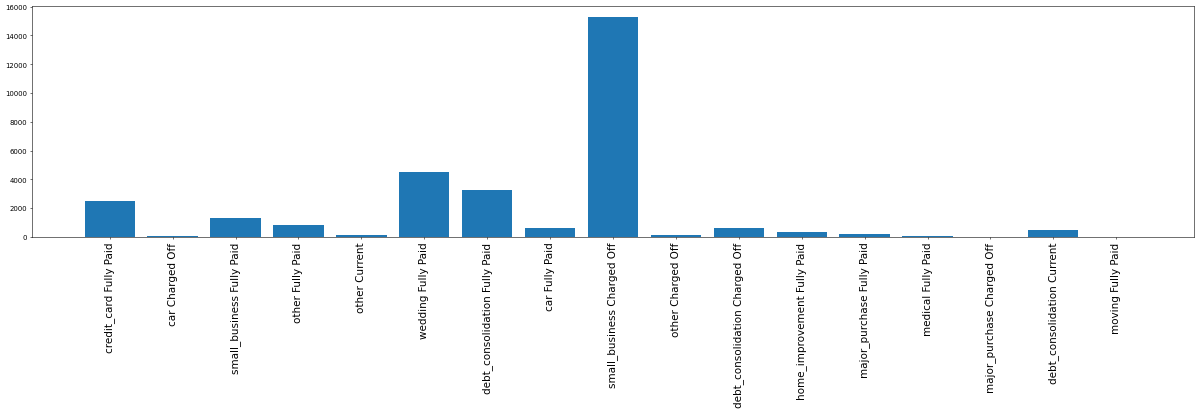

In [235]:
from matplotlib.pyplot import figure

figure(figsize=(30, 6), dpi=50)


plt.bar(loan_purpose['purpose_loan_status'] ,loan_purpose['id'])
plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.show()
# From the below plot it is quite clear that people with a purpose of setting up small business are way more susceptible for charged off

In [265]:
# checking the effect of dti, inq_last_6mths, open_acc and revol_bal on loan status
loan_df['dti'] = loan_df['dti'].astype('float')
loan_df['inq_last_6mths'] = loan_df['inq_last_6mths'].astype('int64')
loan_df['open_acc'] = loan_df['open_acc'].astype('int64')
loan_df['revol_bal'] = loan_df['revol_bal'].astype('int64')

In [267]:
loan_median_df = loan_df.groupby(['loan_status'])\
[['dti','inq_last_6mths','open_acc','revol_bal']].median().reset_index()

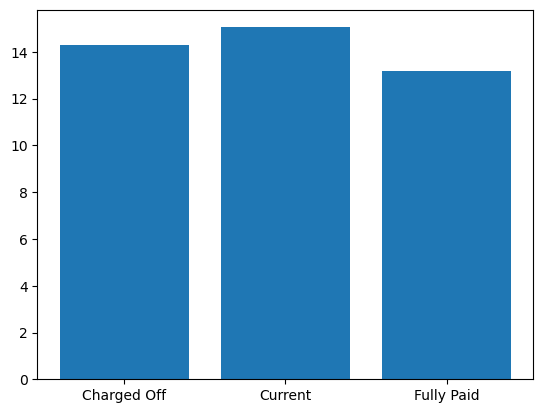

In [269]:
plt.bar(loan_median_df['loan_status'],loan_median_df['dti'])
plt.show()
# from the plot it is seen that there is not much difference between median value of dti 

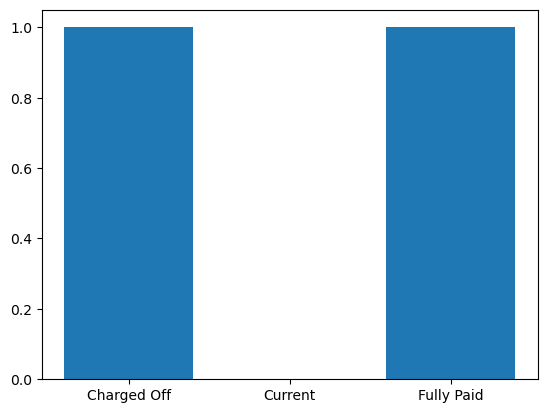

In [103]:
plt.bar(loan_median_df['loan_status'],loan_median_df['inq_last_6mths'])
plt.show()
# from below plot we can see median value of inq_last_6mths are same for charged off and fully paid, os no clear conclusion can be drawn

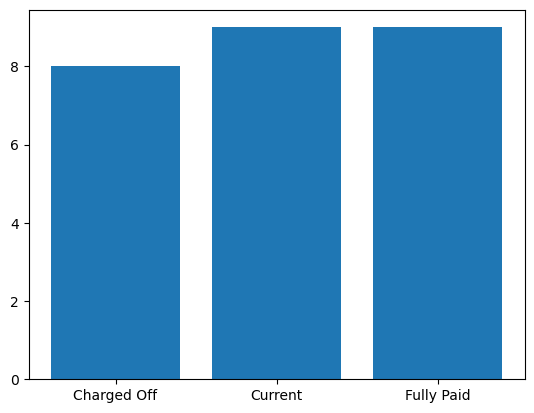

In [105]:
plt.bar(loan_median_df['loan_status'],loan_median_df['open_acc'])
plt.show()
# Not much difference in the number of open account among loan status

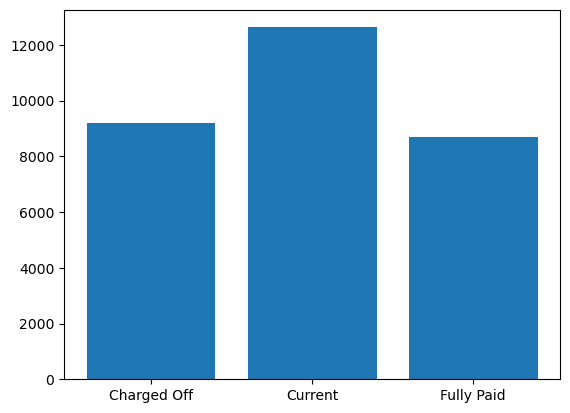

In [115]:
plt.bar(loan_median_df['loan_status'],loan_median_df['revol_bal'])
plt.show()
# This plot is also not giving any clear direction on loan status